# Generate GeoJSON from Natural Earth Data

## Install Dependencies

```
pip install geopandas shapely matplotlib
```

## Download Data

Download datasets (_Admin 0 - Countries_ in [1:10](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/), and _Admin 1 – States, Provinces_ in 1:10 and [1:50](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/)) from Natural Earch Data:

In [1]:
# Dependencies

import os
import json
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely
import pandas as pd
import shapely.geometry
import shapely.ops
import shapely.affinity
from shapely.geometry import Polygon, MultiPolygon
import shutil

Matplotlib is building the font cache; this may take a moment.


In [2]:
speed_run = False
# set this to True if you want to skip all the rendering of previews in this notebook and just get an update of GeoJSON/TS/JSON files.

In [3]:
data_dir = os.path.expanduser("~/Downloads")
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

def download_files(skip_existing: bool):
    for url in [
        "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip",
        "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip",
        "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_1_states_provinces.zip"
    ]:
        file_name = url.split('/')[-1]
        full_file_name = f'{data_dir}/{file_name}'
        # temporary fix
        url = url.replace("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download", "https://naciscdn.org/naturalearth")
        with requests.get(
            url,
            headers={
                "accept-encoding": "gzip, deflate, br",
                "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36"
            },
            stream=True,
        ) as res:
            file_size = int(res.headers['content-length'])
            if res.status_code != 200:
                print("Error downloading files. Please open the URL to download them from browser manually.")
                break
            if (
                skip_existing and
                os.path.exists(full_file_name) and
                file_size == os.path.getsize(full_file_name)
            ):
                print(f"Skip {file_name} because it already exists")
                continue
            print(f"Downloading {file_name}... \r", end="")
            with open(full_file_name, "wb") as fh:
                fh.write(res.content)
    print("Done.                                                            ")

download_files(skip_existing=False)

Done.                                                            


In [4]:
# Read Natural Earth data files into GeoDataFrames
df_admin0_10m = gpd.read_file(f"{data_dir}/ne_10m_admin_0_countries.zip")
df_10m = gpd.read_file(f"{data_dir}/ne_10m_admin_1_states_provinces.zip")
df_50m = gpd.read_file(f"{data_dir}/ne_50m_admin_1_states_provinces.zip")

# Convert column names to lowercase
df_admin0_10m.columns = df_admin0_10m.columns.str.lower()

In [5]:
df_50m.groupby('admin').count()

featurecla  scalerank  adm1_code  diss_me  \
admin                                                                 
Australia                          9          9          9        9   
Brazil                            27         27         27       27   
Canada                            13         13         13       13   
China                             31         31         31       31   
India                             36         36         36       36   
Indonesia                         33         33         33       33   
Russia                            85         85         85       85   
South Africa                       9          9          9        9   
United States of America          51         51         51       51   

                          iso_3166_2  wikipedia  iso_a2  adm0_sr  name  \
admin                                                                    
Australia                          9          0       9        9     9   
Brazil                            27          0      27       27    27   
Canada                            13         13      13       13    13   
China                             31          0      31       31    31   
India                             36          0      36       36    36   
Indonesia                         33          0      33       33    33   
Russia                            85          1      85       85    85   
South Africa                       9          0       9        9     9   
United States of America          51         51      51       51    51   

                          name_alt  ...  FCLASS_ID  FCLASS_PL  FCLASS_GR  \
admin                               ...                                    
Australia                        0  ...          0          0          0   
Brazil                          13  ...          0          0          0   
Canada                           9  ...          0          0          0   
China                           30  ...          0          0          0   
India                           13  ...          0          0          0   
Indonesia                       30  ...          0          0          0   
Russia                          84  ...          0          0          0   
South Africa                     9  ...          0          0          0   
United States of America        51  ...          0          0          0   

                          FCLASS_IT  FCLASS_NL  FCLASS_SE  FCLASS_BD  \
admin                                                                  
Australia                         0          0          0          0   
Brazil                            0          0          0          0   
Canada                            0          0          0          0   
China                             0          0          0          0   
India                             0          0          0          0   
Indonesia                         0          0          0          0   
Russia                            0          0          0          0   
South Africa                      0          0          0          0   
United States of America          0          0          0          0   

                          FCLASS_UA  FCLASS_TLC  geometry  
admin                                                      
Australia                         0           0         9  
Brazil                            0           0        27  
Canada                            0           0        13  
China                             0           0        31  
India                             0           0        36  
Indonesia                         0           0        33  
Russia                            0           0        85  
South Africa                      0           0         9  
United States of America          0           0        51  

[9 rows x 121 columns]

In [6]:
# Use 1:50m geometry for some large countries:

print(*df_50m['admin'].unique(), sep='\n')

Australia
Brazil
Canada
United States of America
China
India
Indonesia
Russia
South Africa


In [7]:
df = pd.concat([df_10m[~df_10m['admin'].isin(df_50m['admin'].unique())], df_50m])

## Adjust the Maps

<span style="color: red; font-size: 1.5em">TO SUPPORT NEW COUNTRIES, ADD COUNTRY NAME BELOW</span>

In [8]:
# Country names used in file names
countries = [
  'afghanistan',
  'aland',
  'albania',
  'algeria',
  'american samoa',
  'andorra',
  'angola',
  'anguilla',    
  'antarctica',
  'antigua and barbuda',
  'argentina',
  'armenia',
  'aruba',
  'australia',
  'austria',
  'azerbaijan',
  'the bahamas',
  'bahrain',
  'bangladesh',
  'barbados',
  'belarus',
  'belgium',
  'belize',
  'benin',
  'bermuda',
  'bhutan',
  'bolivia',
  # 'bonaire, sint eustatius and saba', # Part of Netherlands Antilles, part of Netherlands, accordsing to Natural Earth?
  'bosnia and herzegovina',
  'botswana',
  # 'bouvet island', # part of Norway, in Natural Earth data
  'brazil',
  'brunei',
  'british indian ocean territory',
  'bulgaria',
  'burkina faso',
  'burundi',
  'cape verde',
  'cambodia',
  'cameroon',
  'canada',
  'cayman islands',
  'central african republic',
  'chad',
  'chile',
  'china',
  # 'christmas island', # part of British Indian Ocean Territory, according to Natural Earth
  # 'cocos (keeling) islands', # part of British Indian Ocean Territory, according to Natural Earth
  'colombia',
  'comoros',
  'democratic republic of the congo',
  'cook islands',
  'costa rica',
  # 'côte d\'ivoire', # not sure why this isn't working
  'croatia',
  'cuba',
  'curaçao',
  'cyprus',
  'czech republic',
  'denmark',
  'djibouti',
  'dominica',
  'dominican republic',
  'ecuador',
  'egypt',
  'el salvador',
  'equatorial guinea',
  'eritrea',
  'estonia',
  # 'eswatini', # not sure why this doesn't work — Swaziland isn't available to alias, either.
  'ethiopia',
  'falkland islands',
  'faroe islands',
  'fiji',
  'finland',
  'france',
  # 'french guiana',
  'french polynesia',
  # 'french southern territories (the)',
  'gabon', 
  'gambia',
  'germany',
  'ghana',
  'gibraltar',
  'greece',
  'greenland',
  'grenada',
  # 'guadeloupe', # part of France, in Natural Earth data
  'guam',
  'guatemala',
  'haiti',
  'hungary',
  'guernsey',
  'guinea',
  # 'guinea-bissau', # not sure why this isn't working
  'guyana',
  'honduras',
  'iceland',
  'india',
  'indonesia',
  'iran',
  'israel',
  'italy',
  'japan',
  'jordan',
  'kazakhstan',
  'kenya',
  'korea',
  'kuwait',
  'kyrgyzstan',
  'laos',
  'latvia',
  'lebanon',
  'lesotho',
  'liberia',
  'libya',
  'liechtenstein',
  'lithuania',
  'luxembourg',
  # 'macao', # part of China, in Natural Earth data
  'macedonia',
  'madagascar',
  'malawi',
  'malaysia',
  'maldives',
  'mali',
  'malta',
  'marshall islands',
  # 'martinique', # part of France, in Natural Earth data
  'mauritania',
  'mauritius',
  # 'mayotte', # part of France, in Natural Earth data
  'mexico',
  'moldova',
  'montserrat',
  'monaco',
  'mongolia',
  'montenegro',
  'morocco',
  'mozambique',
  'myanmar',
  'namibia',
  'nauru',
  'nepal',
  'netherlands',
  'new caledonia',
  'new zealand',
  'nicaragua',
  'niger',
  'nigeria',
  'niue',
  'norfolk island',
  'northern mariana islands',
  'norway',
  'oman',
  'pakistan',
  'palau',
  # 'palestine', # part of Israel, in Natural Earth data
  'panama',
  'papua new guinea',
  'paraguay',
  'peru',
  # 'pitcairn', # part of UK, in Natural Earth data
  'philippines',
  'poland',
  'portugal',
  'puerto rico',
  'qatar',
  # 'réunion', # part of France, in Natural Earth data
  'romania',
  'russia',
  'rwanda',
  'saint barthelemy',
  # 'saint helena, ascension and tristan da cunha', # part of UK, in Natural Earth data
  'saint lucia',
  'saint martin',
  # 'saint martin (french part)', part of Saint Martin, in Natural Earth data
  'saint pierre and miquelon',
  'saint vincent and the grenadines',
  'samoa',
  'san marino',
  'sao tome and principe',
  'saudi arabia',
  'senegal',
  # 'serbia', # not sure why this isn't working!
  'seychelles',
  'sierra leone',
  'singapore',
  # 'sint maarten (dutch part)', part of Saint Martin, in Natural Earth data
  'slovakia',
  'slovenia',
  'solomon islands',
  'somalia',
  'south africa',
  # 'south sudan', # part of Sudan, in Natural Earth data
  'spain',
  'sri lanka',
  'sudan',
  'suriname',
  # 'svalbard and jan mayen', # part of Norway, in Natural Earth data
  'sweden',
  'switzerland',
  'syria',
  'taiwan',
  'tajikistan',
  'tanzania',
  'thailand',
  'timorleste',
  'togo',
  # 'tokelau', # part of New Zealand, in Natural Earth data
  'tonga',
  'trinidad and tobago',
  'tunisia',
  'turkey',
  'turkmenistan',
  'turks and caicos islands',
  'tuvalu',
  'uganda',
  'uk',
  'ukraine',
  'united arab emirates',
  'united states minor outlying islands',
  'uruguay',
  'usa',
  'uzbekistan',
  'vanuatu',
  'vatican',
  'venezuela',
  'vietnam',
  'british virgin islands',
  'united states virgin islands',
  'wallis and futuna',
  'yemen',
  'zambia',
  'zimbabwe'
]

# country name used in dataset
country_name_aliases = {
    "korea": "south korea",
    "uk": "united kingdom",
    "usa": "united states of america",
    "timorleste": "east timor",
    "tanzania": "united republic of tanzania",
}

# CSV files that are defined later in the notebook:
region_maps = [
  'france_regions',
  'italy_regions',
  'philippines_regions',
  'turkey_regions'
]

# Make sure all country names are covered:
invalid_countries = [x for x in countries if (country_name_aliases.get(x, x) not in df["admin"].str.lower().unique()) and (x not in region_maps)]

if invalid_countries:
  print(f"Following country names are not valid: {invalid_countries}")

Preview all countries:

In [9]:
# Plotting style defaults:
plot_styles = {
    'edgecolor': 'black',  # Sets the color of the border of each geometry in the plot to black
    'column': 'name',      # Specifies the column to be used for coloring the geometries based on its values
    'legend': False,       # Disables the legend for the plot
    'cmap': 'tab20',       # Sets the colormap to 'tab20' which provides a distinct set of colors for visual differentiation
    'linewidth': 0.25       # Sets the thickness of the edges/borders of the geometries
}

In [10]:
def get_gdf(country):
    country_alias = country_name_aliases.get(country, country)
    if alt_maps and country in alt_maps:
        gdf = alt_maps[country]
    else:
        gdf = df[df["admin"].str.lower() == country_alias]
    return gdf.copy()

def plot_all_countries(countries, subplot_width=5, subplot_height=5, base_tolerance=0.01):
    if not countries:
        print("No countries to plot.")
        return

    num_countries = len(countries)
    ncols = 6  # Set fixed number of columns
    nrows = max((num_countries + ncols - 1) // ncols, 1)  # Ensure at least one row

    figsize = (ncols * subplot_width, nrows * subplot_height)
    print(f"Debug Info: figsize={figsize}, ncols={ncols}, nrows={nrows}, num_countries={num_countries}")

    plt.figure(figsize=figsize)
    plt.rc('font', size=24)  # Sets the font size globally

    for i, country in enumerate(countries):
        ax = plt.subplot(nrows, ncols, i + 1)
        gdf = get_gdf(country)
        if not gdf.empty:
            gdf_projected = gdf.to_crs(epsg=6933)
            area = gdf_projected['geometry'].area.sum()
            dynamic_tolerance = base_tolerance * (area / 1e6) ** 0.8  
            gdf_projected['geometry'] = gdf_projected['geometry'].simplify(tolerance=dynamic_tolerance, preserve_topology=True)

            gdf.plot(ax=ax, **plot_styles)
            ax.set_aspect('equal', adjustable='datalim')
        else:
            ax.text(0.5, 0.5, country, ha='center', va='center', fontsize=24)
        ax.set_title(country)

    plt.tight_layout()
    plt.show()
    plt.rcdefaults()


# If you want to see a preview of all countries before they're touched up, just switch this to True:
# It's disabled because it takes a while to run.
plot_preview = False
if plot_preview:
 plot_all_countries()

### Handle countries with flying islands

- For countries with flying islands, we need to move the islands closer to the mainland.
- TODO: There are several countries that could use some design touchup, including
  - American Samoa
  - Cook Islands
  - Fiji
  - French Polynesia
  - Maldives
  - Marshall Islands
  - Mauritius
  - New Zealand
  - Palau
  - Portugal
  - Seychelles
  - Tonga
  - United States Minor Outlying Islands

#### USA

<Axes: >

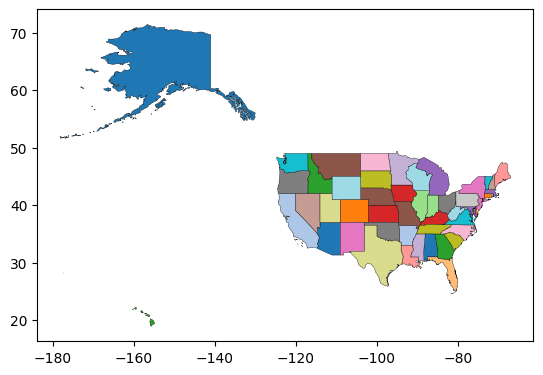

In [11]:
usa = df[df['adm0_a3'] == 'USA']
not speed_run and usa.plot(**plot_styles)

<Axes: >

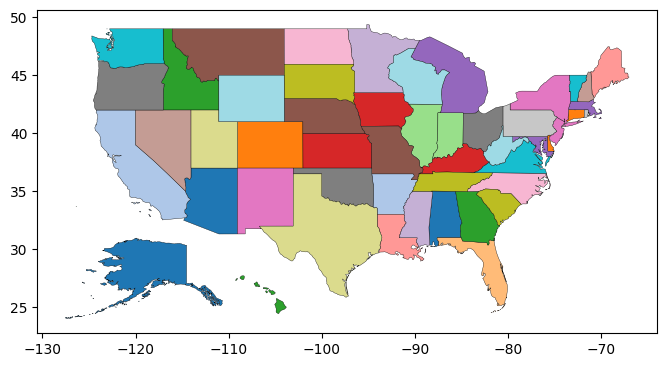

In [12]:
def reposition(df, idx, xoff=None, yoff=None, xscale=None, yscale=None, simplify=None):

    def move_and_scale(series):
        if xoff or yoff:
            series = shapely.affinity.translate(series, xoff or 0, yoff or 0)
        if xscale or yscale:
            series = shapely.affinity.scale(series, xscale or 1, yscale or 1)
        if simplify:
            series = series.simplify(simplify, preserve_topology=False)
        return series

    df.loc[idx, 'geometry'] = df.loc[idx, 'geometry'].apply(move_and_scale)


usa_copy = usa.copy()
reposition(usa_copy, usa.name == 'Hawaii', 51, 5.5)
reposition(usa_copy, usa.name == 'Alaska', 35, -34, 0.35, 0.35)

not speed_run and usa_copy.plot(figsize=(8,8), **plot_styles)

#### China

China claims sovereign over Taiwan. For disputed territories, we respect each country and give them what they want.

In addition, Hong Kong and Macau should also be included in a China map.

In [13]:
# Chinese Special Administrative Regions
china_sars = df_admin0_10m.loc[
    df_admin0_10m.name_en.isin(['Taiwan', 'Hong Kong', 'Macau']),
    [x for x in df_admin0_10m.columns if x in df.columns]
]
china_sars = china_sars.merge(pd.DataFrame(
    data={
        "name_en": ["Taiwan", "Hong Kong", "Macau"],
        "name_zh": ["中国台湾", "香港特别行政区", "澳门特别行政区"],
        "iso_3166_2": ["CN-71", "CN-91", "CN-92"],
    },
), on="name_en", how="left")
china_sars

featurecla  scalerank  labelrank sov_a3               type  \
0  Admin-0 country          0          4    CH1            Country   
1  Admin-0 country          0          3    TWN  Sovereign country   
2  Admin-0 country          0          4    CH1            Country   

              admin adm0_a3 gu_a3       name  abbrev  ...   name_sv  \
0  Hong Kong S.A.R.     HKG   HKG  Hong Kong    H.K.  ...  Hongkong   
1            Taiwan     TWN   TWN     Taiwan  Taiwan  ...    Taiwan   
2       Macao S.A.R     MAC   MAC      Macao    Mac.  ...     Macao   

           name_tr           name_uk    name_ur    name_vi  name_zh_x  \
0        Hong Kong           Гонконг  ہانگ کانگ  Hồng Kông         香港   
1  Çin Cumhuriyeti  Республіка Китай    تائیوان   Đài Loan       中华民国   
2            Makao            Аоминь       مکاؤ     Ma Cao         澳门   

   name_zht                                           geometry  name_zh_y  \
0        香港  MULTIPOLYGON (((114.22983 22.55581, 114.23471 ...    香港特别行政区   
1      中華民國  MULTIPOLYGON (((121.90577 24.9501, 121.83473 2...       中国台湾   
2        澳門  MULTIPOLYGON (((113.5586 22.16303, 113.56943 2...    澳门特别行政区   

   iso_3166_2  
0       CN-91  
1       CN-71  
2       CN-92  

[3 rows x 51 columns]

<Axes: >

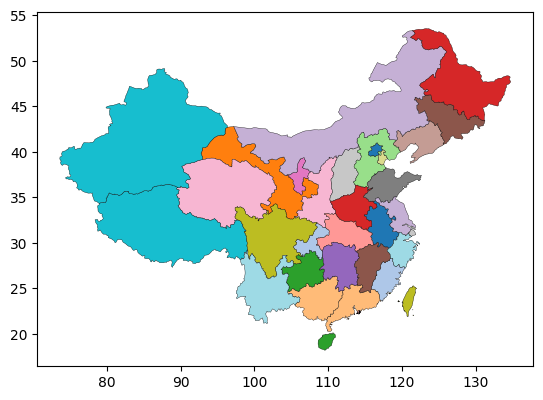

In [14]:
china = df[df.admin == "China"]
china_copy = pd.concat([china, china_sars], ignore_index=True)

# Combine the 'name_zh' columns
china_copy["name_zh"] = china_copy["name_zh"].combine_first(china_copy["name_zh_y"])

# Drop the extra 'name_zh_x' and 'name_zh_y' columns, if they exist
china_copy = china_copy.drop(["name_zh_x", "name_zh_y"], axis=1)

# Plotting the DataFrame
not speed_run and china_copy.plot(**plot_styles)

Note [ISO-3166-2:CN](https://en.wikipedia.org/wiki/ISO_3166-2:CN) has updated subdivisions to use letters instead of numbers (e.g. `CN-91` -> `CN-HK`). We kept the numeric code for backward compatibility.

#### Finland

- The Åland Islands (ISO country code AX) is an autonomous region of Finland, and carries the ISO-3166 code FI-01.

In [15]:
finland_aland = df_admin0_10m.loc[
    df_admin0_10m.name_en.isin(['Åland']),
    [x for x in df_admin0_10m.columns if x in df.columns]
]
finland_aland = finland_aland.merge(pd.DataFrame(
    data={
        "name_en": ["Åland"],
        "name_fi": ["Ahvenanmaan maakunta"],
        "iso_3166_2": ["FI-01"],
    },
), on="name_en", how="left")


<Axes: >

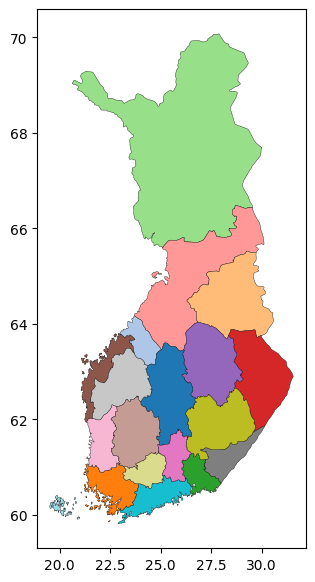

In [16]:
finland = df[df.admin == "Finland"]

# Concatenate the 'finland' DataFrame with 'finland_aland' DataFrame
finland_copy = pd.concat([finland, finland_aland], ignore_index=True)

# Combine 'name_fi' columns. However, since both columns are named 'name_fi', this might be redundant
# If you have two different columns for 'name_fi' values in each DataFrame, specify them as 'name_fi_x' and 'name_fi_y'
finland_copy["name_fi"] = finland_copy["name_fi"].combine_first(finland_copy["name_fi"])

# Drop the 'name_fi' column, if that's intended. This will remove the 'name_fi' data entirely.
# If you meant to drop other columns (like 'name_fi_x' and 'name_fi_y'), update the column names accordingly
finland_copy = finland_copy.drop(["name_fi"], axis=1)

# Plotting the DataFrame
not speed_run and finland_copy.plot(figsize=(7, 7), **plot_styles)


#### Ukraine

- Crimea, carrying ISO-3166 code UA-43, belongs to Ukraine (ISO country code UA)

<Axes: >

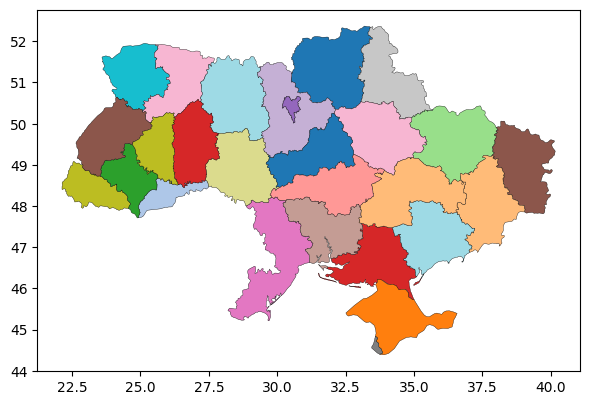

In [17]:

russia_copy = df[df['adm0_a3'] == 'RUS'].copy()
crimea = russia_copy[russia_copy['iso_3166_2'] == 'UA-43'].copy()
sevastopol = russia_copy[russia_copy['iso_3166_2'] == 'UA-40'].copy()

ukraine_with_crimea = pd.concat([df[df['adm0_a3'] == 'UKR'], crimea, sevastopol], ignore_index=True)

# kyiv = ukraine_with_crimea[ukraine_with_crimea['iso_3166_2'] == 'UA-30']
# kyiv_oblast = ukraine_with_crimea[ukraine_with_crimea['iso_3166_2'] == 'UA-32']

# Update the name of the Kyiv city entry
ukraine_with_crimea.loc[ukraine_with_crimea['iso_3166_2'] == 'UA-30', 'name'] = 'Kyiv'

# # Update the name of the Kyiv Oblast entry
ukraine_with_crimea.loc[ukraine_with_crimea['iso_3166_2'] == 'UA-32', 'name'] = 'Kyiv Oblast'

# Plotting the DataFrame
not speed_run and ukraine_with_crimea.plot(figsize=(7,7), **plot_styles)

### India

- Jammu and Kashmir and Ladakh with ISO-3166 codes IN-JK and IN-LA respectively are new territories of India. They are part of the disputed region of Jammu and Kashmir.

In [18]:
india = df[df['admin'] == 'India']
india_copy = india.copy()

# Download and load the GeoJSON file for India
india_geojson_url = "https://github.com/geohacker/india/raw/bcb920c7d3c686f01d085f7661c9ba89bf9bf65e/state/india_state_kashmir_ladakh.geojson"

try:
    india_gdf = gpd.read_file(india_geojson_url)
    # Rename column to 'ST_ID' to 'iso_3166_2' for consistency
    india_gdf.rename(columns={'ST_ID': 'iso_3166_2'}, inplace=True)
    # Update the geometry for the states of Jammu and Kashmir and Ladakh
    india_copy.loc[india_copy['iso_3166_2'] == 'IN-JK', 'geometry'] = india_gdf[india_gdf['iso_3166_2'] == 'IN-JK'].dissolve(by='iso_3166_2').reset_index()["geometry"].values
    india_copy.loc[india_copy['iso_3166_2'] == 'IN-LA', 'geometry'] = india_gdf[india_gdf['iso_3166_2'] == 'IN-LA'].dissolve(by='iso_3166_2').reset_index()["geometry"].values
    print("GeoJSON file for India downloaded and loaded successfully.")
except Exception as e:
    
    print(f"Unable to download or load the GeoJSON file for India. Error: {str(e)}")
    print("Please download the file from the URL and try again.")

GeoJSON file for India downloaded and loaded successfully.


<Axes: >

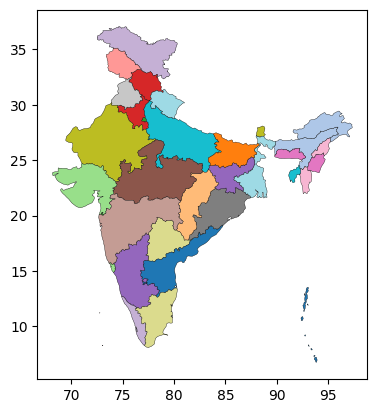

In [19]:
not speed_run and india_copy.plot(**plot_styles)

#### Norway

- Remove NO-X01~ (The uninhabited Bouvet Island) and move Svalbard closer to mainland

<Axes: >

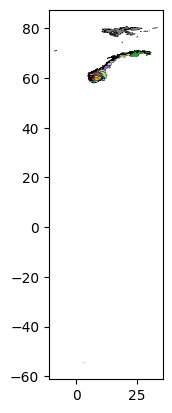

In [20]:
norway = df[df['adm0_a3'] == 'NOR']
not speed_run and norway.plot(**plot_styles)

<Axes: >

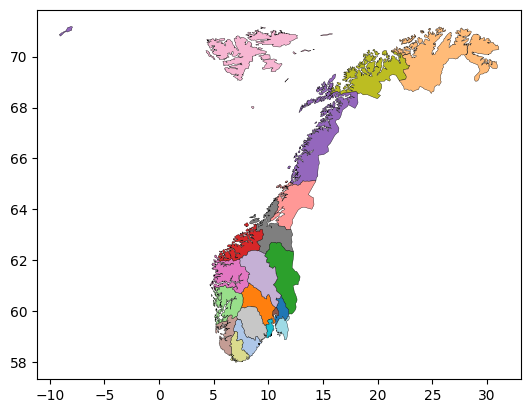

In [21]:
norway_copy = norway.copy()

norway_copy = norway_copy[norway_copy["iso_3166_2"] != "NO-X01~"]
reposition(norway_copy, norway.name == 'Svalbard', -12, -8, 0.5, 0.5)
#reposition(norway_copy, norway.name == 'Nordland', 10, 0, 2, 2)

not speed_run and norway_copy.plot(**plot_styles)

#### Portugal

<Axes: >

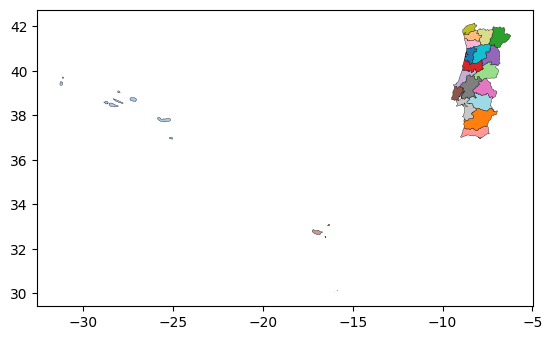

In [22]:
portugal = df[df.admin == 'Portugal']
not speed_run and portugal.plot(**plot_styles)

<Axes: >

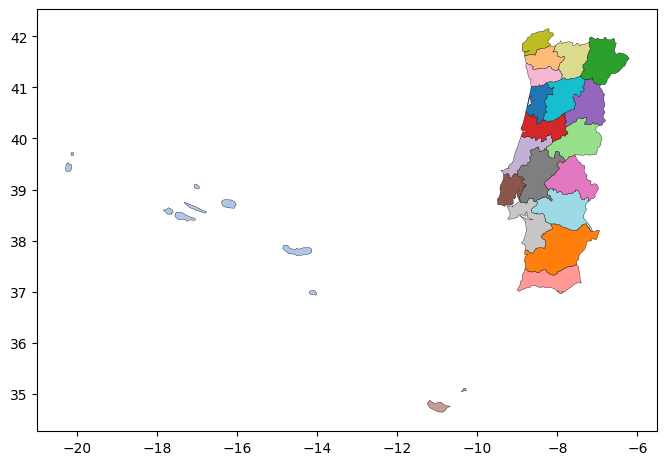

In [23]:
portugal_copy = portugal.copy()

reposition(portugal_copy, portugal.name == 'Azores', 11, 0)
reposition(portugal_copy, portugal.name == 'Madeira', 6, 2, simplify=0.015)

not speed_run and portugal_copy.plot(figsize=(8, 8), **plot_styles)

#### Spain

<Axes: >

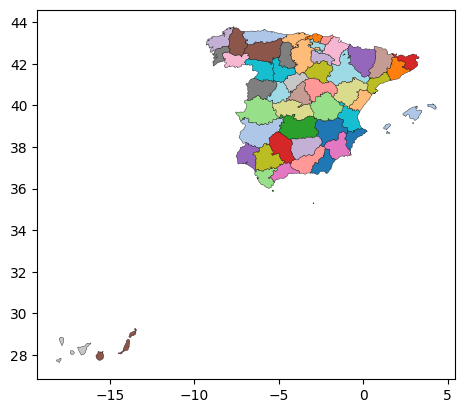

In [24]:
spain = df[df.admin == 'Spain']
not speed_run and spain.plot(**plot_styles)

<Axes: >

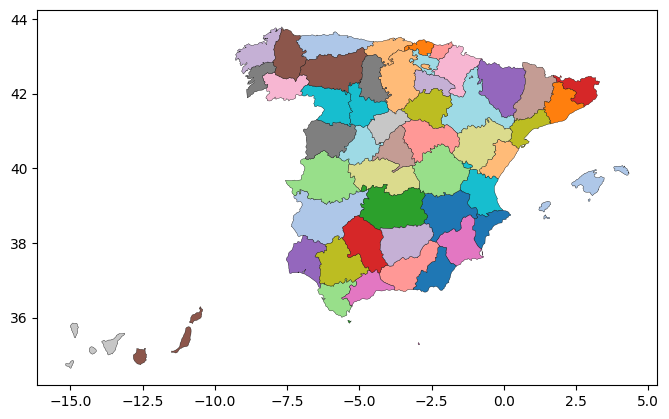

In [25]:
spain_copy = spain.copy()

reposition(spain_copy, spain.name.isin(['Las Palmas', 'Santa Cruz de Tenerife']), 3, 7, 1, 1)

not speed_run and spain_copy.plot(figsize=(8, 8), **plot_styles)

#### Russia

<Axes: >

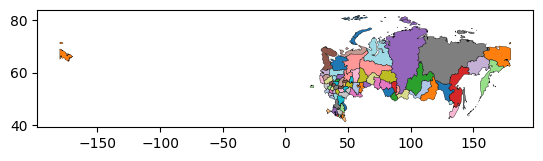

In [26]:
russia = df[df.admin == 'Russia']
not speed_run and russia.plot(**plot_styles)

- Russia looks off because of Chukchi runs across E180. We need to move the parts on the other side of the map to the right.

<Axes: >

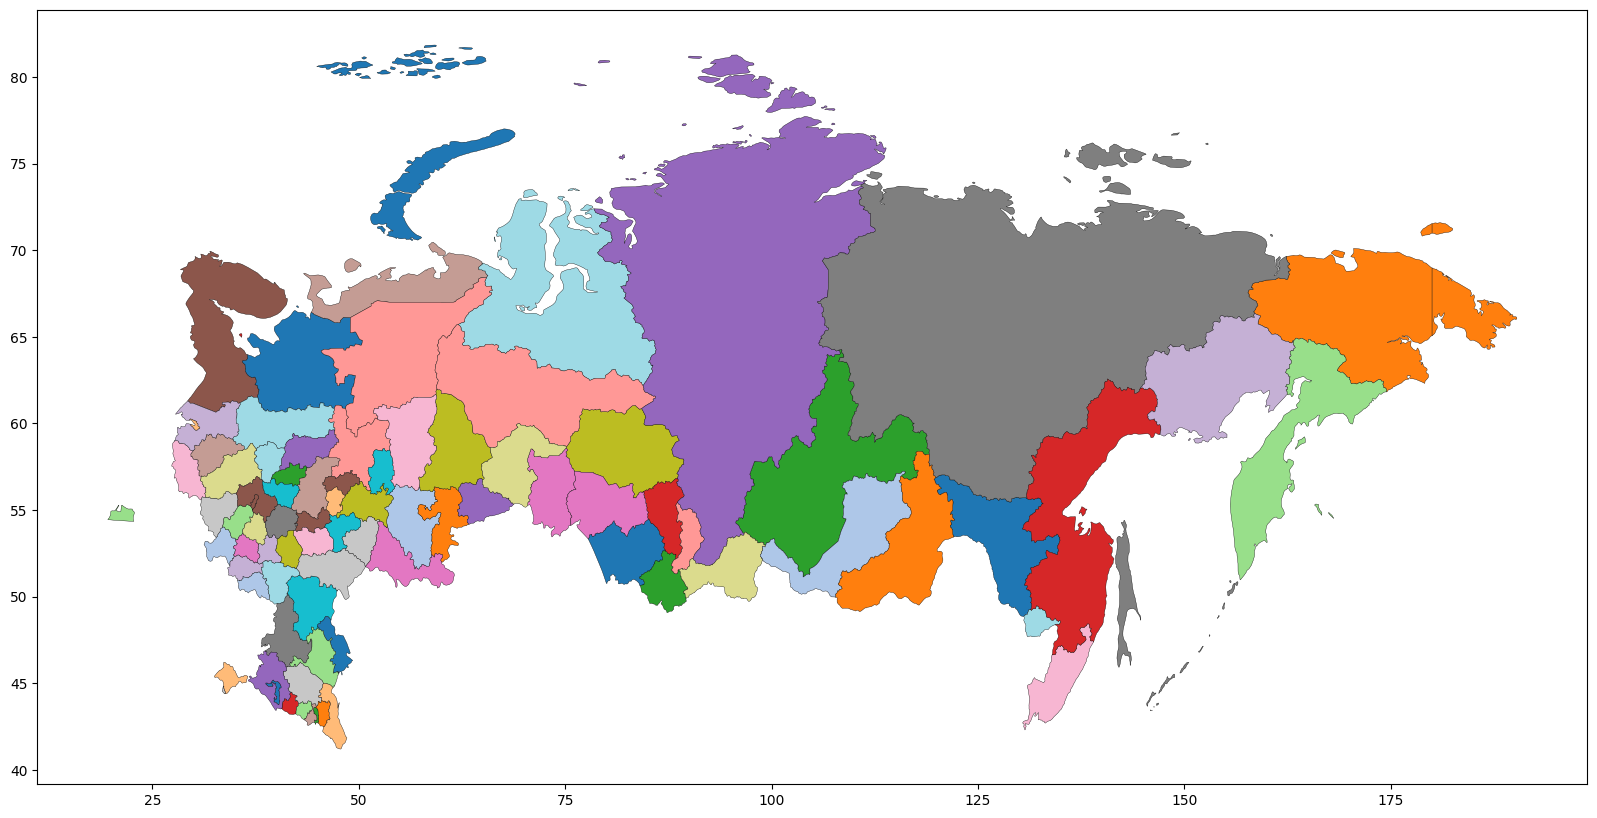

In [27]:
def shift_geom(geom, cutoff=0):
    border = shapely.geometry.LineString([(cutoff, -90), (cutoff, 90)])
    splitted_geom = shapely.ops.split(geom, border)

    # Create a list to store moved geometries
    moved_geom = []

    # Check if the split operation returned a GeometryCollection
    if isinstance(splitted_geom, shapely.geometry.GeometryCollection):
        # Iterate over each geometry in the GeometryCollection
        for item in splitted_geom.geoms:
            minx, miny, maxx, maxy = item.bounds
            if minx < cutoff:
                # Translate the geometry
                moved_geom.append(shapely.affinity.translate(item, xoff=360 - cutoff))
            else:
                moved_geom.append(item)
    else:
        # If the result is not a GeometryCollection, it means no split occurred
        moved_geom.append(geom)

    # Combine all moved geometries into a single geometry
    return shapely.ops.unary_union(moved_geom)

# Applying the function to the DataFrame
russia_copy = russia.copy()
russia_copy.loc[
    russia.name == 'Chukchi Autonomous Okrug', 'geometry'
] = russia_copy.loc[
    russia.name == 'Chukchi Autonomous Okrug', 'geometry'
].apply(shift_geom)

# Plotting
not speed_run and russia_copy.plot(figsize=(20, 20), **plot_styles)


### Turkey

#### Turkey Regions

<Axes: >

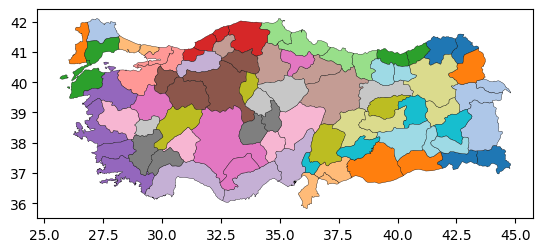

In [28]:
turkey = df[df.admin == 'Turkey'][['iso_3166_2','geometry']]
not speed_run and turkey.plot(**{key: value for key, value in plot_styles.items() if key != 'column'})

In [29]:
# NUTS - 1 Codes for Turkey and correspong region - city names

region_dict = {
 'TR1': ['TR-34'],
 'TR2': ['TR-59', 'TR-22', 'TR-39', 'TR-10', 'TR-17'],
 'TR3': ['TR-35', 'TR-09', 'TR-20', 'TR-48', 'TR-45', 'TR-03', 'TR-43', 'TR-64'],
 'TR4': ['TR-16', 'TR-26', 'TR-11', 'TR-41', 'TR-54', 'TR-81', 'TR-14', 'TR-77'],
 'TR5': ['TR-06', 'TR-42', 'TR-70'],
 'TR6': ['TR-07', 'TR-32', 'TR-15', 'TR-01', 'TR-33', 'TR-31', 'TR-46', 'TR-80'],
 'TR7': ['TR-71', 'TR-68', 'TR-51', 'TR-50', 'TR-40', 'TR-38', 'TR-58', 'TR-66'],
 'TR8': ['TR-67', 'TR-78', 'TR-74', 'TR-37', 'TR-18', 'TR-57', 'TR-55', 'TR-60', 'TR-19', 'TR-05'],
 'TR9': ['TR-61', 'TR-52', 'TR-28', 'TR-53', 'TR-08', 'TR-29'],
 'TRA': ['TR-25', 'TR-24', 'TR-69', 'TR-04', 'TR-36', 'TR-76', 'TR-75'],
 'TRB': ['TR-44', 'TR-23', 'TR-12', 'TR-62', 'TR-65', 'TR-49', 'TR-13', 'TR-30'],
 'TRC': ['TR-27', 'TR-02', 'TR-79', 'TR-63', 'TR-21', 'TR-47', 'TR-72', 'TR-73', 'TR-56']}

# Region names corresponding to NUTS-1

region_name_dict = {'TR1':'İstanbul',
                    'TR2':'Batı Marmara',
                    'TR3':'Ege',
                    'TR4':'Doğu Marmara',
                    'TR5':'Batı Anadolu',
                    'TR6':'Akdeniz',
                    'TR7':'Orta Anadolu',
                    'TR8':'Batı Karadeniz',
                    'TR9':'Doğu Karadeniz',
                    'TRA':'Kuzeydoğu Anadolu',
                    'TRC':'Güneydoğu Anadolu',
                    'TRB':'Ortadoğu Anadolu'
                    }


def create_region_polygons(region_dict, turkey_gdf):
    # Create a reverse dictionary where city codes map to region codes
    city_to_region = {city_code: region_code for region_code, city_codes in region_dict.items() for city_code in city_codes}

    # Create a new column 'REGION' in the GeoDataFrame that maps each city to its region
    turkey_gdf['REGION'] = turkey_gdf['iso_3166_2'].map(city_to_region)

    # Dissolve the GeoDataFrame on the 'REGION' column to combine city polygons into region polygons
    region_gdf = turkey_gdf.dissolve(by='REGION')

    # Reset the index of the new GeoDataFrame
    region_gdf.reset_index(inplace=True)
    
    return region_gdf.drop(columns=['iso_3166_2'])

In [30]:
turkey_regions = create_region_polygons(region_dict, turkey)

# Rename 'REGION' column to 'ISO'
turkey_regions = turkey_regions.rename(columns={'REGION': 'iso_3166_2'})

# Map the region_name_dict to a new 'NAME_1' column
turkey_regions['name'] = turkey_regions['iso_3166_2'].map(region_name_dict)

<Axes: >

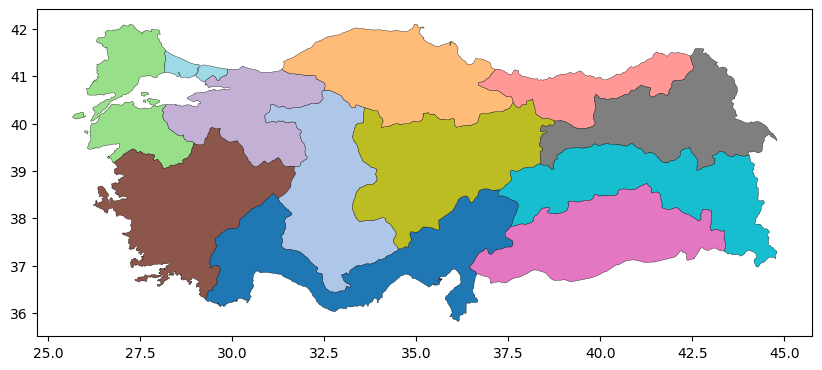

In [31]:
not speed_run and turkey_regions.plot(figsize=(10, 7), **plot_styles)

### France

<Axes: >

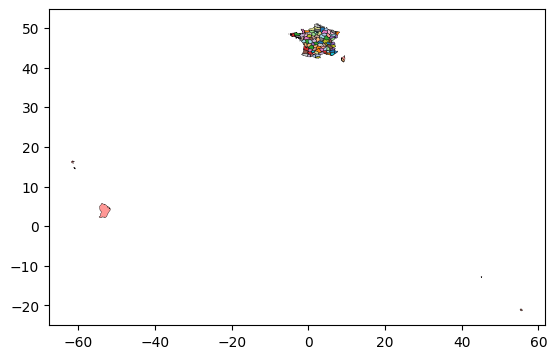

In [32]:
france = df[df.admin == 'France']
not speed_run and france.plot(**plot_styles)

Move the [Overseas departments and regions of France](https://en.wikipedia.org/wiki/Overseas_departments_and_regions_of_France) closer to mainland.

Fix some department names

- Seien-et-Marne => Seine-et-Marne
- Haute-Rhin => Haut-Rhin

In [33]:
def replace_name(df, old, new):
    if old in list(df.name):  
        index = df[df.name == old].index[0]
        df.at[index, 'name'] = new
        
replace_name(france, 'Seien-et-Marne', 'Seine-et-Marne')
replace_name(france, 'Haute-Rhin', 'Haut-Rhin')

<Axes: >

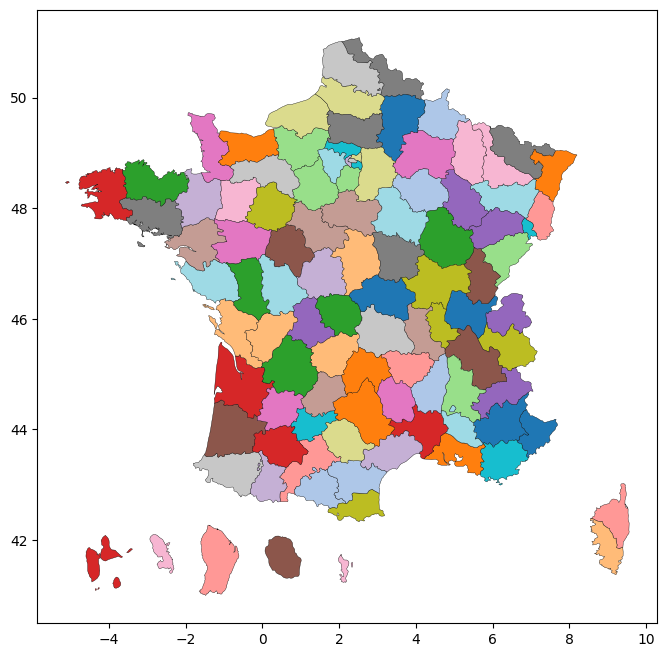

In [34]:
france_copy = france.copy()
reposition(france_copy, france.name=='Guadeloupe', 57.4, 25.4, 1.5, 1.5)
reposition(france_copy, france.name=='Martinique', 58.4, 27.1, 1.5, 1.5)
reposition(france_copy, france.name=='Guyane française', 52, 37.7, 0.35, 0.35)
reposition(france_copy, france.name=='La Réunion', -55, 62.8, 1.5, 1.5)
reposition(france_copy, france.name=='Mayotte', -43, 54.3, 1.5, 1.5)

not speed_run and france_copy.plot(figsize=(8, 8), **plot_styles)

#### France Regions

In [35]:
france_regions = france_copy[['geometry','region_cod','region']]

In [36]:
france_regions = france_regions.dissolve(by=['region_cod', 'region']).reset_index()

france_regions = france_regions.rename(columns={'region': 'name', 'region_cod': 'iso_3166_2'})

<Axes: >

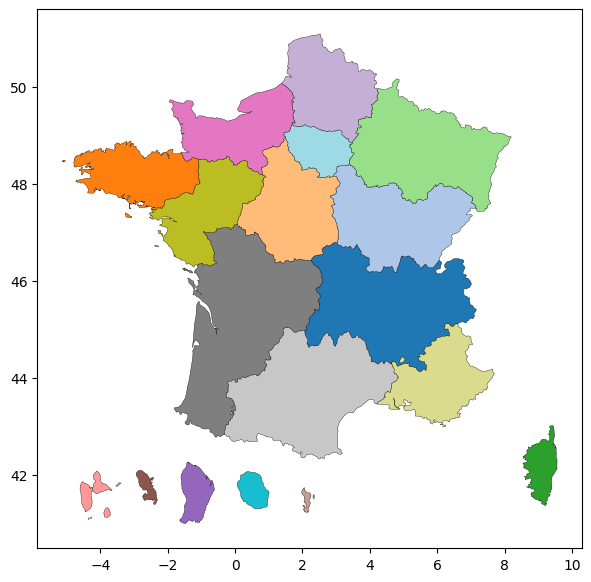

In [37]:
not speed_run and france_regions.plot(figsize=(10, 7), **plot_styles)

### Italy

#### Italy Regions

In [38]:
italy_regions = df[df.admin == 'Italy'][['geometry','region_cod','region']]

italy_regions = italy_regions.dissolve(by=['region_cod', 'region']).reset_index()

italy_regions = italy_regions.rename(columns={'region': 'name', 'region_cod': 'iso_3166_2'})

<Axes: >

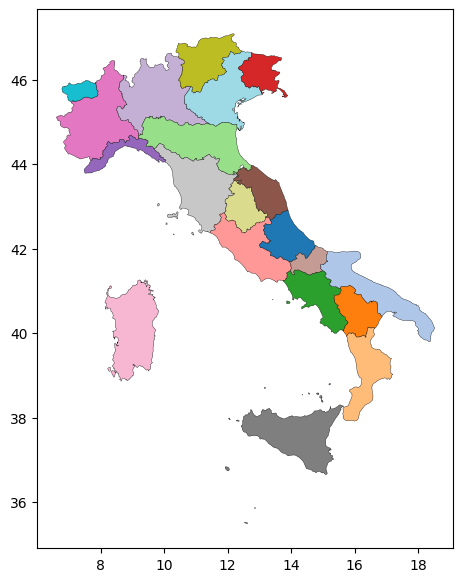

In [39]:
not speed_run and italy_regions.plot(figsize=(10, 7), **plot_styles)

#### Netherlands

In [40]:
def apply_bounds(df, northwest, southeast):
    x1, y1 = northwest
    x2, y2 = southeast
    boundry = shapely.geometry.Polygon([(x1, y1),(x1, y2), (x2, y2), (x2, y1)])
    df = df.copy()
    return df[df.geometry.apply(lambda x: boundry.contains(x))]

<Axes: >

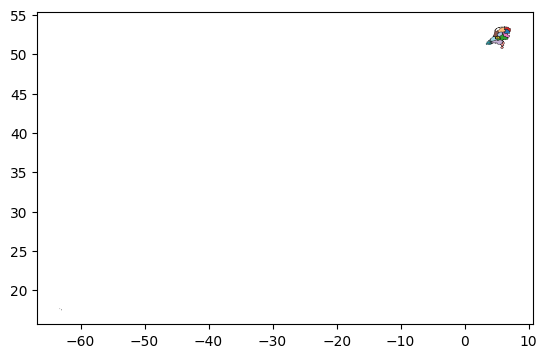

In [41]:
netherlands = df[df.admin == 'Netherlands']
not speed_run and netherlands.plot(**plot_styles)

<Axes: >

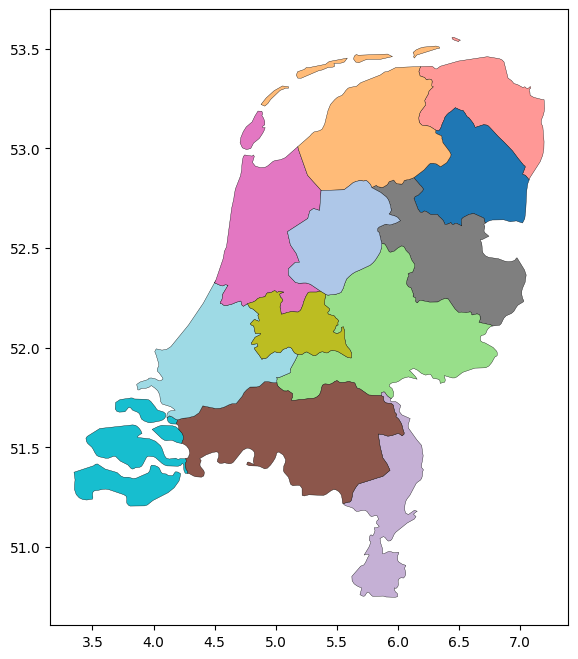

In [42]:
netherlands_copy = apply_bounds(netherlands, (-20, 60), (20, 20))
not speed_run and netherlands_copy.plot(figsize=(8, 8), **plot_styles)

#### UK

<Axes: >

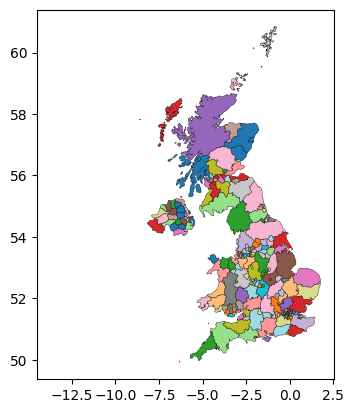

In [43]:
uk = df[df.admin == 'United Kingdom']
not speed_run and uk.plot(**plot_styles)

<Axes: >

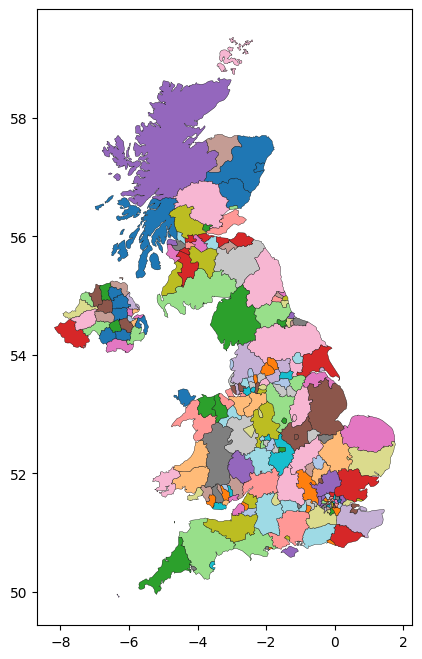

In [44]:
uk_copy = apply_bounds(uk, (-10, 60), (20, 20))
not speed_run and uk_copy.plot(figsize=(8, 8), **plot_styles)

### Philippines
- Merges highly urbanized cities (HUCs) into their respective geographic provinces
- Updates provinces:
    - Forms Maguindanao del Norte and Maguindanao del Sur from the former Maguindanao province
    - Splits off Davao Occidental from Davao del Sur
    - Renames Compostella Valley to Davao de Oro

In [45]:
ph_url = "https://raw.githubusercontent.com/jdruii/phgeojson/main/philippines.geojson"
philippines_copy = gpd.read_file(ph_url)

<Axes: >

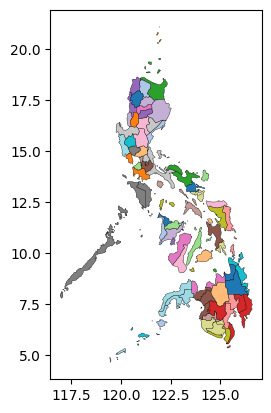

In [46]:
philippines_copy = philippines_copy.rename(columns={'NAME_1': 'name','ISO': 'iso_3166_2'})
not speed_run and philippines_copy.plot(**plot_styles)

### Philippines Regions
- Adds regional map
    - Fixes outdated names

In [47]:
philippines_regions = df[df.admin == 'Philippines'][['geometry','region_cod','region']]

In [48]:
philippines_regions = philippines_regions.dissolve(by=['region_cod', 'region']).reset_index()
philippines_regions = philippines_regions.rename(columns={'region': 'name', 'region_cod': 'iso_3166_2'})

In [49]:
philippines_regions['name'].replace({'Dinagat Islands (Region XIII)': 'Caraga Administrative Region (Region XIII)', 
                                     'Autonomous Region in Muslim Mindanao (ARMM)': 'Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)'}, 
                                    inplace=True)

/var/folders/qb/g_y12hgx11q6zfl1y75kmn2c0000gn/T/ipykernel_17310/784227429.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  philippines_regions['name'].replace({'Dinagat Islands (Region XIII)': 'Caraga Administrative Region (Region XIII)',


<Axes: >

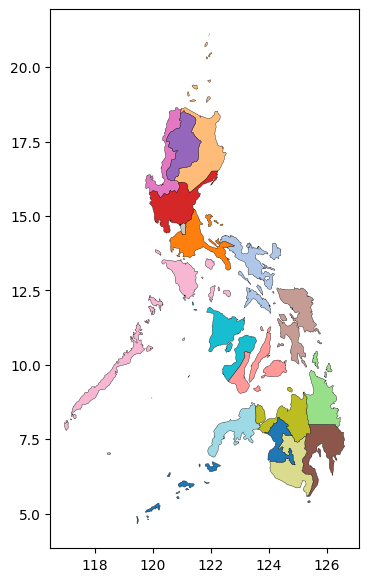

In [50]:
not speed_run and philippines_regions.plot(figsize = (10, 7), **plot_styles)

## Output GeoJSON Files

In [51]:
# Gather up all the tweaked maps!
alt_maps = {
    "finland": finland_copy,
    "china": china_copy,
    "usa": usa_copy,
    "france": france_copy,
    "france_regions": france_regions,
    "turkey_regions": turkey_regions,
    "italy_regions": italy_regions,
    "philippines_regions": philippines_regions,
    "netherlands": netherlands_copy,
    "norway": norway_copy,
    "uk": uk_copy,
    "russia": russia_copy,
    "spain": spain_copy,
    "portugal": portugal_copy,
    "ukraine": ukraine_with_crimea,
    "india": india_copy,
}



In [52]:
# Filter out countries that only have one region, making them effectively useless as a choropleth

def get_num_subdivisions(country):
    gdf = get_gdf(country)
    subdivisions = gdf['iso_3166_2'].unique()
    if len(subdivisions) == 1:
        print(country, "has only one subdivision - removing from countries array")
    return len(subdivisions)

# we add the unnecessaery countries to a list here, for clearing out unneeded geojson files later
countries_to_purge = [country for country in countries if get_num_subdivisions(country) <= 1]

# now we purge those from our main "countries" list to continue processing
countries = [country for country in countries if get_num_subdivisions(country) > 1]

aruba has only one subdivision - removing from countries array
british indian ocean territory has only one subdivision - removing from countries array
cayman islands has only one subdivision - removing from countries array
curaçao has only one subdivision - removing from countries array
falkland islands has only one subdivision - removing from countries array
faroe islands has only one subdivision - removing from countries array
gibraltar has only one subdivision - removing from countries array
guam has only one subdivision - removing from countries array
guernsey has only one subdivision - removing from countries array
monaco has only one subdivision - removing from countries array
niue has only one subdivision - removing from countries array
norfolk island has only one subdivision - removing from countries array
puerto rico has only one subdivision - removing from countries array
saint barthelemy has only one subdivision - removing from countries array
saint martin has only one subdi

In [53]:
simplify_factors = {
    "uk": 0.005,
}
useful_columns = ["ISO", "NAME_1", "geometry"]

def get_simplify_factor_by_size(gdf):
    xmin, ymin, xmax, ymax = shapely.ops.unary_union(gdf["geometry"]).bounds
    size = (xmax - xmin) * (ymax - ymin)
    print("Size", round(size, 3), end="\t")
    if size > 1000: return 0.03
    if size > 300: return 0.02
    if size > 100: return 0.01
    return 0

def simplify_if_needed(country, gdf):
    """Simplify the maps based on country size"""
    country_alias = country_name_aliases.get(country, country)
    if country_alias in df_50m["admin"].str.lower().unique():
        return

    factor = simplify_factors.get(country) or get_simplify_factor_by_size(gdf)

    if factor:
        gdf["geometry"] = gdf.simplify(factor)

def save_geojson(country):
    gdf = get_gdf(country)
    print(country, end="\t")

    # For backward compatibility
    gdf["ISO"] = gdf["iso_3166_2"]
    gdf["NAME_1"] = gdf["name"]

    simplify_if_needed(country, gdf)

    print(f'Saving geojson for {country}...')
    filename_country = country.replace(' ', '_')
    gdf[useful_columns].to_file(f"../src/countries/{filename_country}.geojson", driver="GeoJSON")

for country in countries_to_purge:
    filename_country = country.replace(' ', '_')
    filepath = f"../src/countries/{filename_country}.geojson"
    if os.path.exists(filepath):
        os.remove(filepath)
        print(f"Purged {filepath} since it has only one region")

for country in countries:
    save_geojson(country)

# this overwrites some of the above... could be optimized
for country in alt_maps:
    save_geojson(country)

print("Done.                          ")

afghanistan	Size 130.904	Saving geojson for afghanistan...
aland	Size 0.913	Saving geojson for aland...
albania	Size 5.325	Saving geojson for albania...
algeria	Size 374.167	Saving geojson for algeria...
american samoa	Size 10.187	Saving geojson for american samoa...
andorra	Size 0.079	Saving geojson for andorra...
angola	Size 169.034	Saving geojson for angola...
anguilla	Size 0.217	Saving geojson for anguilla...
antarctica	Size 10614.165	Saving geojson for antarctica...
antigua and barbuda	Size 0.542	Saving geojson for antigua and barbuda...
argentina	Size 662.347	Saving geojson for argentina...
armenia	Size 7.684	Saving geojson for armenia...
australia	Saving geojson for australia...
austria	Size 20.068	Saving geojson for austria...
azerbaijan	Size 20.466	Saving geojson for azerbaijan...
the bahamas	Size 41.199	Saving geojson for the bahamas...
bahrain	Size 0.311	Saving geojson for bahrain...
bangladesh	Size 27.194	Saving geojson for bangladesh...
barbados	Size 0.067	Saving geojson f

Debug Info: figsize=(30, 165), ncols=6, nrows=33, num_countries=194


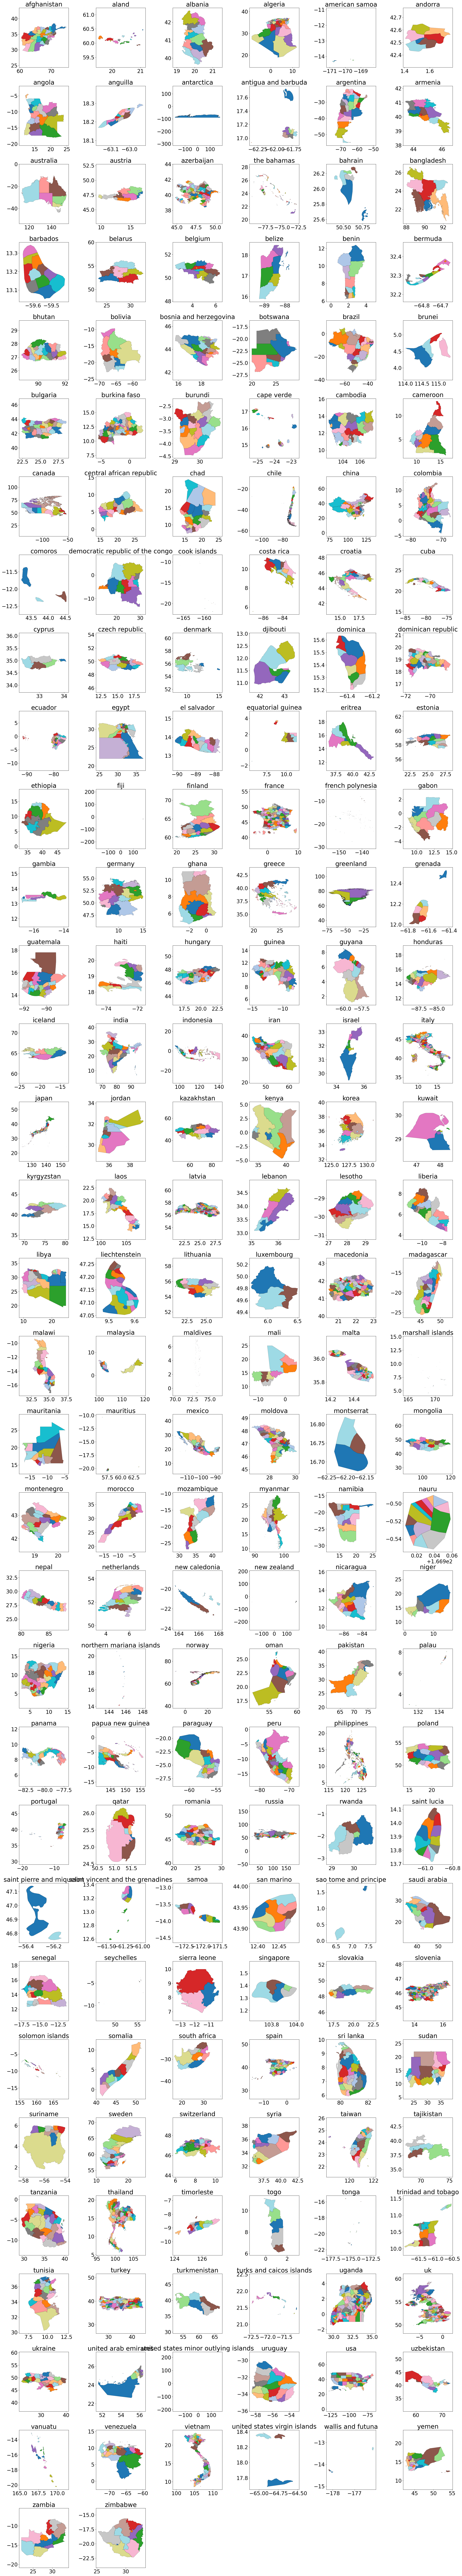

In [54]:
not speed_run and plot_all_countries(countries)

## Output Typescript for Control Panel & JSON for Docs Site

In [55]:


# Function to convert country name to a valid JavaScript identifier
def to_js_identifier(name):
    return name.replace(' ', '_').replace('-', '_')

# License boilerplate
license_boilerplate = """/*
 * Licensed to the Apache Software Foundation (ASF) under one
 * or more contributor license agreements.  See the NOTICE file
 * distributed with this work for additional information
 * regarding copyright ownership.  The ASF licenses this file
 * to you under the Apache License, Version 2.0 (the
 * "License"); you may not use this file except in compliance
 * with the License.  You may obtain a copy of the License at
 *
 *   http://www.apache.org/licenses/LICENSE-2.0
 *
 * Unless required by applicable law or agreed to in writing,
 * software distributed under the License is distributed on an
 * "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY
 * KIND, either express or implied.  See the License for the
 * specific language governing permissions and limitations
 * under the License.
 */
"""

countries_combined = list(set([*countries, *alt_maps.keys()]))
countries_combined = sorted(countries_combined)

# Generate TypeScript import statements
imports = "\n".join([f"import {to_js_identifier(country)} from './countries/{to_js_identifier(country)}.geojson';" for country in countries_combined])

# Generate the export object
exports = "export const countries = {\n  " + ",\n  ".join([to_js_identifier(country) for country in countries_combined]) + ",\n};"

# Additional exports
additional_exports = """
export const countryOptions = Object.keys(countries).map(x => {
  if (x === 'uk' || x === 'usa') {
    return [x, x.toUpperCase()];
  }
  if (x === 'italy_regions') {
    return [x, 'Italy (regions)'];
  }
  if (x === 'france_regions') {
    return [x, 'France (regions)'];
  }
  if (x === 'turkey_regions') {
    return [x, 'Turkey (regions)'];
  }
  return [
    x,
    x
      .split('_')
      .map(e => e[0].toUpperCase() + e.slice(1))
      .join(' '),
  ];
});

export default countries;
"""

# Combine license, imports, exports, and additional exports
typescript_code = f"{license_boilerplate}\n{imports}\n\n{exports}\n{additional_exports}"

# Write to a file
with open("../src/countries.ts", "w") as file:
    file.write(typescript_code)

print("TypeScript code written to src/countries.ts")

# DOCS JSON:
# Replace underscores with spaces and title-case each country name
formatted_countries = [country.replace("_", " ") for country in countries_combined]
formatted_countries = [country.upper() if country in {"usa", "uk"} else country.title() for country in formatted_countries]
formatted_countries = [country.replace(" Regions"," (regions)") for country in formatted_countries]


# Create a dictionary in the desired format
data = {"countries": formatted_countries}
# Convert the dictionary to a JSON string with proper formatting
json_data = json.dumps(data, indent=2) + "\n"

# Write to a file
with open("../../../../docs/data/countries.json", "w") as file:
    file.write(json_data)

print("JSON written to docs/data/countries.json")

TypeScript code written to src/countries.ts
JSON written to docs/data/countries.json
